<a href="https://colab.research.google.com/github/dkapesa/mechanical/blob/main/Mechanical_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Feature Selection:

Which statistical and frequency-domain features are most indicative of specific bearing faults, and how does their selection impact model accuracy?

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/feature_time_48k_2048_load_1.csv')

In [ ]:
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the fault labels
label_encoder = LabelEncoder()
df['fault']  = label_encoder.fit_transform(df['fault'])

# Separate features and target variable
X = df.drop('fault', axis=1)
y = df['fault']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Initialise the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualisation
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importances

,Feature,Importance
3,sd,0.204858
4,rms,0.192213
2,mean,0.162676
6,kurtosis,0.110891
0,max,0.102374
1,min,0.080399
8,form,0.067388
7,crest,0.058938
5,skewness,0.020263


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

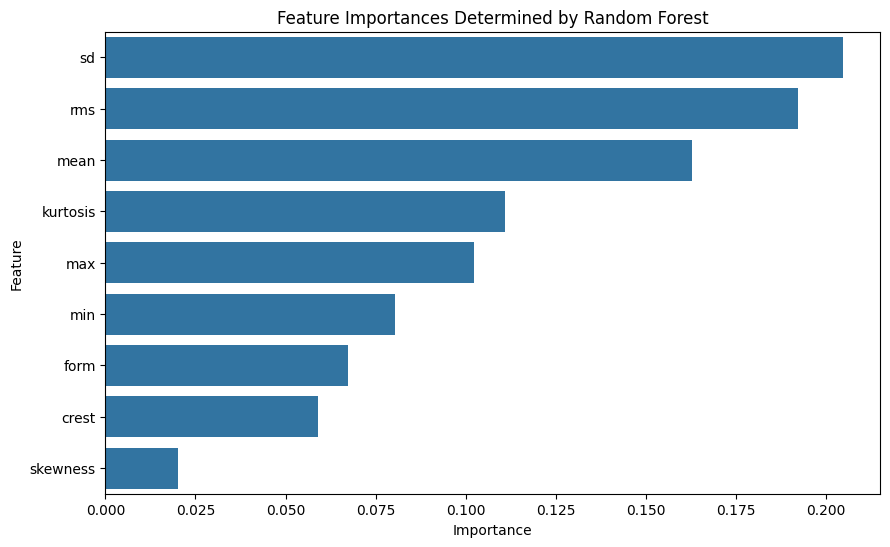

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances Determined by Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Function to evaluate model accuracy with top N features
def evaluate_model_with_top_features(n):
    top_features = feature_importances['Feature'].head(n)
    X_top = X[top_features]
    scores = cross_val_score(rf, X_top, y, cv=5, scoring='accuracy')
    return np.mean(scores)

# Evaluate model with top 5 features
accuracy_top_5 = evaluate_model_with_top_features(5)
accuracy_top_5

0.9595652173913042

2.	Model Performance:

How do different machine learning algorithms compare in terms of fault detection and classification accuracy for this dataset?

In [ ]:
import pandas as pd

file_path = '/content/feature_time_48k_2048_load_1.csv'
data = pd.read_csv(file_path)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical fault labels into numerical values
label_encoder = LabelEncoder()
data['fault'] = label_encoder.fit_transform(data['fault'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns=['fault'])
y = data['fault']

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialise models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.93
Support Vector Machine Accuracy: 0.93
K-Nearest Neighbors Accuracy: 0.92
Random Forest Accuracy: 0.97
Gradient Boosting Accuracy: 0.96


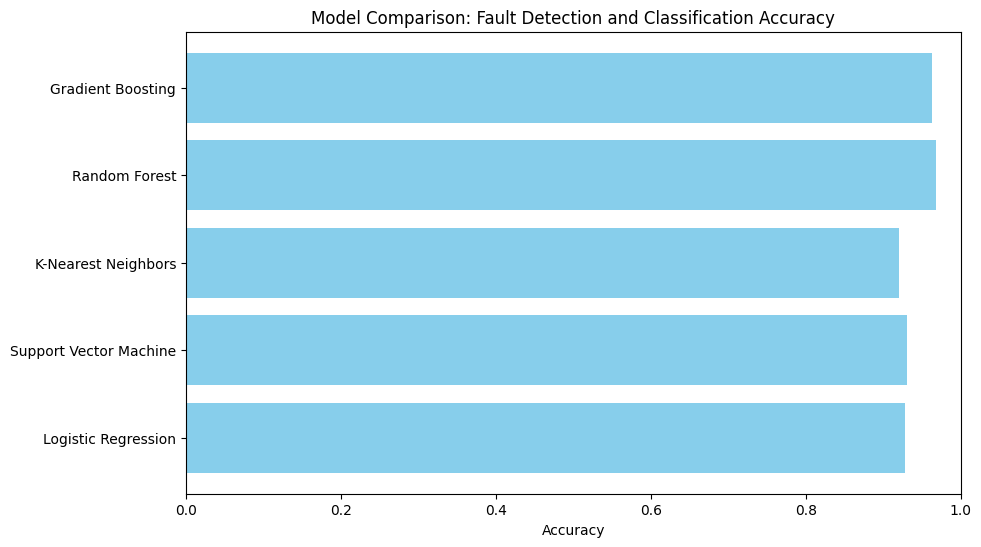

In [ ]:
import matplotlib.pyplot as plt

# Collect model names and their corresponding accuracies
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison: Fault Detection and Classification Accuracy')
plt.xlim(0, 1)
plt.show()

3.	Predictive Capability:

What is the effectiveness of time series forecasting models in estimating the remaining useful life of bearings, and how can their predictions be validated?

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/feature_time_48k_2048_load_1.csv')
print(df.head())

       max      min      mean        sd       rms  skewness  kurtosis  \
0  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   

      crest      form       fault  
0  2.901946  6.950855  Ball_007_1  
1  3.482334  6.035202  Ball_007_1  
2  3.102819  7.376926  Ball_007_1  
3  3.691097  7.558387  Ball_007_1  
4  3.193561  6.312085  Ball_007_1  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df.describe())

               max          min         mean           sd          rms  \
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000   
mean      1.575079    -1.550994     0.015711     0.341601     0.342289   
std       1.578422     1.602706     0.006469     0.305279     0.304813   
min       0.157300    -6.292600     0.003246     0.059140     0.061067   
25%       0.456398    -2.174975     0.011236     0.135506     0.136374   
50%       0.794510    -0.733700     0.013730     0.188551     0.190662   
75%       2.278425    -0.426987     0.018638     0.555589     0.555671   
max       6.825900    -0.160220     0.038386     1.256577     1.256311   

          skewness     kurtosis        crest         form  
count  2300.000000  2300.000000  2300.000000  2300.000000  
mean     -0.042251     2.664444     4.173130    26.544769  
std       0.180774     4.411096     1.148349    29.209702  
min      -1.089928    -0.803795     2.428511     3.484429  
25%      -0.103426    -0.015164  

In [ ]:
# Inspect data types
print(df.dtypes)

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

max         float64
min         float64
mean        float64
sd          float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
fault        object
dtype: object
               max       min      mean        sd       rms  skewness  \
max       1.000000 -0.992793 -0.165105  0.951709  0.951700 -0.065620   
min      -0.992793  1.000000  0.171739 -0.947029 -0.947007  0.137173   
mean     -0.165105  0.171739  1.000000 -0.211367 -0.209568 -0.002229   
sd        0.951709 -0.947029 -0.211367  1.000000  0.999998  0.047614   
rms       0.951700 -0.947007 -0.209568  0.999998  1.000000  0.047715   
skewness -0.065620  0.137173 -0.002229  0.047614  0.047715  1.000000   
kurtosis  0.662241 -0.672925 -0.011141  0.432915  0.432718 -0.422060   
crest     0.633399 -0.616668  0.143599  0.419115  0.419176 -0.187349   
form      0.844366 -0.840658 -0.395792  0.920629  0.920397  0.091861   

          kurtosis     crest      form  
max       0.662241  0.63

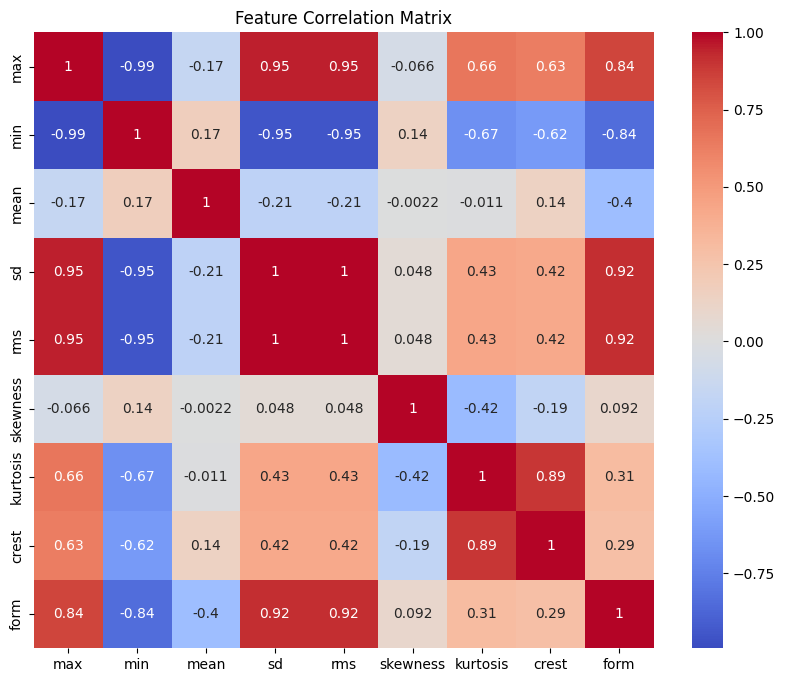

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Calculate RUL by grouping by 'fault' and reversing the count
df['RUL'] = df.groupby('fault').cumcount(ascending=False)

# Preview the updated dataset
print(df[['fault', 'RUL']].head())

        fault  RUL
0  Ball_007_1  229
1  Ball_007_1  228
2  Ball_007_1  227
3  Ball_007_1  226
4  Ball_007_1  225


In [ ]:
# Feature selection
features = ['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']
X = df[features]
y = df['RUL']  # Assuming RUL labels are available

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Model building
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Model training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2, shuffle=False)

Epoch 1/50
58/58 - 3s - 51ms/step - loss: 17212.8223 - val_loss: 18346.7695
Epoch 2/50
58/58 - 0s - 3ms/step - loss: 16987.5723 - val_loss: 17970.4707
Epoch 3/50
58/58 - 0s - 3ms/step - loss: 16457.4297 - val_loss: 17188.6680
Epoch 4/50
58/58 - 0s - 3ms/step - loss: 15548.4043 - val_loss: 16030.0518
Epoch 5/50
58/58 - 0s - 6ms/step - loss: 14357.4385 - val_loss: 14647.4229
Epoch 6/50
58/58 - 0s - 5ms/step - loss: 13034.8369 - val_loss: 13193.4102
Epoch 7/50
58/58 - 0s - 4ms/step - loss: 11708.0303 - val_loss: 11778.7979
Epoch 8/50
58/58 - 0s - 4ms/step - loss: 10445.6553 - val_loss: 10438.1182
Epoch 9/50
58/58 - 0s - 3ms/step - loss: 9294.1143 - val_loss: 9257.2539
Epoch 10/50
58/58 - 0s - 6ms/step - loss: 8337.0459 - val_loss: 8307.1865
Epoch 11/50
58/58 - 0s - 3ms/step - loss: 7603.0918 - val_loss: 7590.7505
Epoch 12/50
58/58 - 0s - 3ms/step - loss: 7072.3608 - val_loss: 7075.5576
Epoch 13/50
58/58 - 0s - 3ms/step - loss: 6703.5781 - val_loss: 6715.6919
Epoch 14/50
58/58 - 0s - 3ms/s

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Model prediction
y_pred = model.predict(X_test_scaled)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 60.93137741088867
Root Mean Squared Error: 69.51587259733384


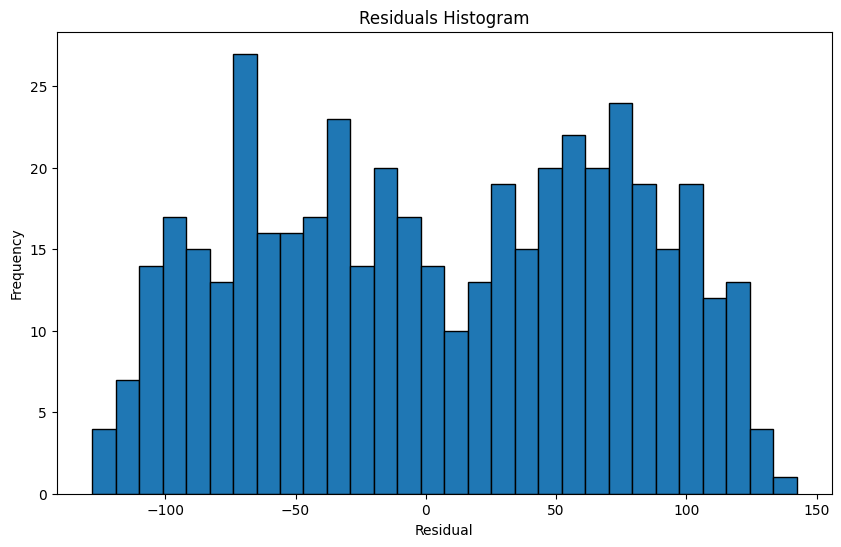

In [ ]:
# Residual analysis
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

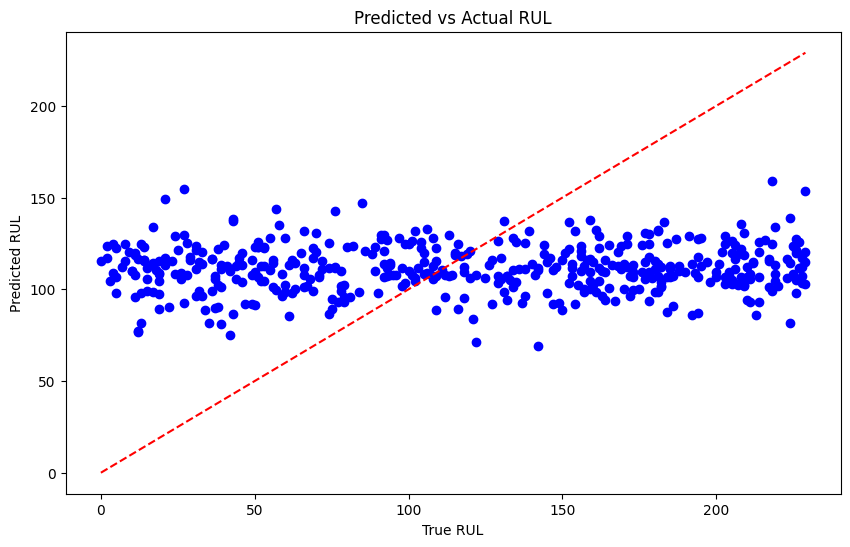

In [ ]:
# Model prediction
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs Actual RUL')
plt.show()

4.	Mechanical Correlation:

How do the identified vibration signal patterns correspond to known mechanical failure modes in bearings, and what insights can be drawn for maintenance planning?

In [ ]:
import pandas as pd

file_path = '/content/feature_time_48k_2048_load_1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

       max      min      mean        sd       rms  skewness  kurtosis  \
0  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   

      crest      form       fault  
0  2.901946  6.950855  Ball_007_1  
1  3.482334  6.035202  Ball_007_1  
2  3.102819  7.376926  Ball_007_1  
3  3.691097  7.558387  Ball_007_1  
4  3.193561  6.312085  Ball_007_1  


In [ ]:
# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

               max          min         mean           sd          rms  \
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000   
mean      1.575079    -1.550994     0.015711     0.341601     0.342289   
std       1.578422     1.602706     0.006469     0.305279     0.304813   
min       0.157300    -6.292600     0.003246     0.059140     0.061067   
25%       0.456398    -2.174975     0.011236     0.135506     0.136374   
50%       0.794510    -0.733700     0.013730     0.188551     0.190662   
75%       2.278425    -0.426987     0.018638     0.555589     0.555671   
max       6.825900    -0.160220     0.038386     1.256577     1.256311   

          skewness     kurtosis        crest         form  
count  2300.000000  2300.000000  2300.000000  2300.000000  
mean     -0.042251     2.664444     4.173130    26.544769  
std       0.180774     4.411096     1.148349    29.209702  
min      -1.089928    -0.803795     2.428511     3.484429  
25%      -0.103426    -0.015164  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Encode fault types as numerical values
df['fault_code'] = df['fault'].astype('category').cat.codes

In [ ]:
# Inspect data types
print(df.dtypes)

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

max           float64
min           float64
mean          float64
sd            float64
rms           float64
skewness      float64
kurtosis      float64
crest         float64
form          float64
fault          object
fault_code       int8
dtype: object
                 max       min      mean        sd       rms  skewness  \
max         1.000000 -0.992793 -0.165105  0.951709  0.951700 -0.065620   
min        -0.992793  1.000000  0.171739 -0.947029 -0.947007  0.137173   
mean       -0.165105  0.171739  1.000000 -0.211367 -0.209568 -0.002229   
sd          0.951709 -0.947029 -0.211367  1.000000  0.999998  0.047614   
rms         0.951700 -0.947007 -0.209568  0.999998  1.000000  0.047715   
skewness   -0.065620  0.137173 -0.002229  0.047614  0.047715  1.000000   
kurtosis    0.662241 -0.672925 -0.011141  0.432915  0.432718 -0.422060   
crest       0.633399 -0.616668  0.143599  0.419115  0.419176 -0.187349   
form        0.844366 -0.840658 -0.395792  0.920629  0.920397  0.091861   
faul

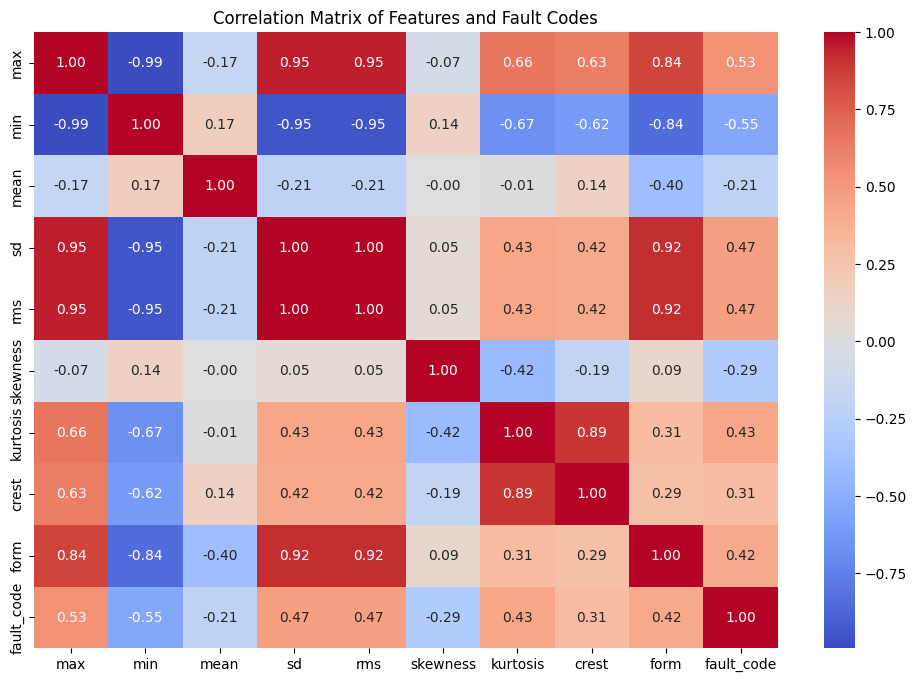

In [ ]:
# Visualise the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Fault Codes')
plt.show()

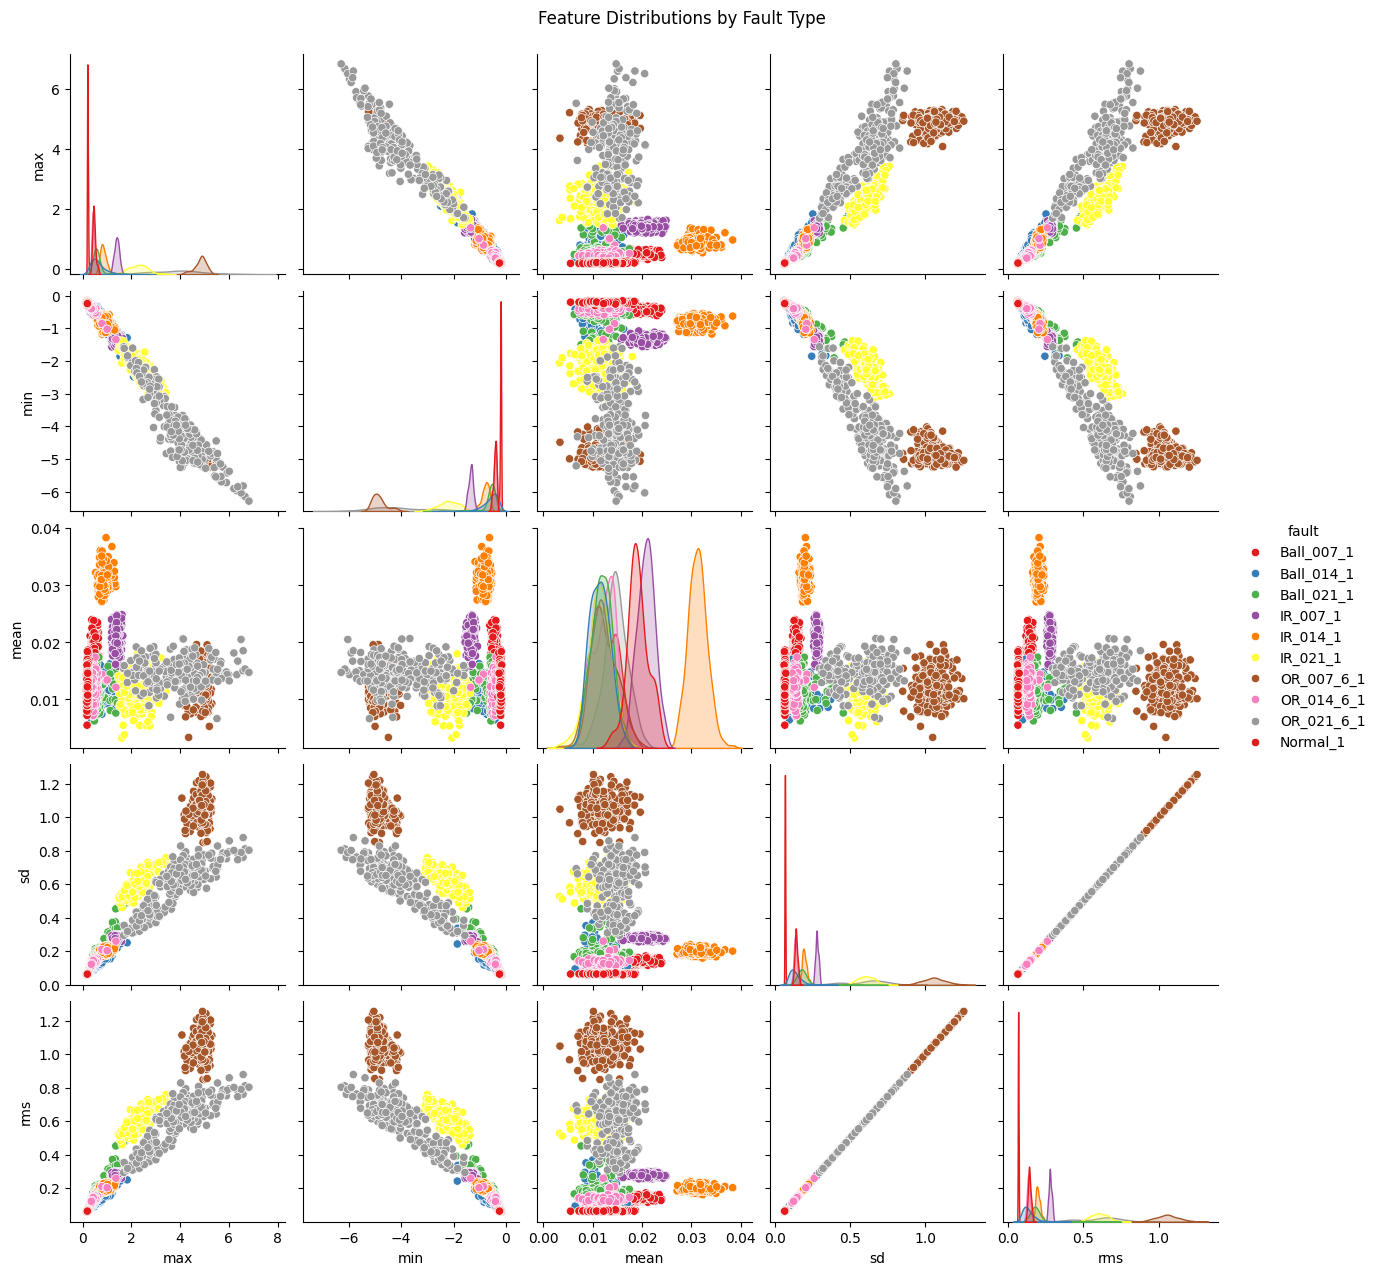

In [ ]:
# Pairplot of selected features colored by fault type
selected_features = ['max', 'min', 'mean', 'sd', 'rms', 'fault']
sns.pairplot(df[selected_features], hue='fault', palette='Set1')
plt.suptitle('Feature Distributions by Fault Type', y=1.02)
plt.show()